### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace 

running build_ext
running build_ext


# Import all the relevant files 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help

data_dir = "./Data/"
figure_dir = "./Figures/"

2023-02-27 15:53:22,026	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 127.0.0.1:6379...
2023-02-27 15:53:22,033	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


# Choose the experiment and create the main pipeline

In [6]:
#Choose the experiment
experimentchoice = 'stopsignal'

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experimentchoice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

In [7]:
#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

75434668


# Running the pipeline

In [8]:
environment = {
    'experimentchoice': experimentchoice,
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df': None, #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': 1, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.95, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #STN
    'stop_signal_present': True,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.45, # amplitude of the stop signal over base line
    'stop_signal_onset': 55., #in ms #antes 200
    'stop_signal_duration' : 160., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #D2STR
    'stop_signal_present_2': True,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1., # amplitude of the stop signal over base line
    'stop_signal_onset_2': 55., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)  

(worker pid=2203) reward_values [1.17640523 1.04001572 1.0978738 ]
(worker pid=2203) cp_idx [0 1 2 2]
(worker pid=2203) cp_idx [0 1 2 2]
(worker pid=2203) reward_values [1.17640523 1.04001572 1.0978738 ]
(worker pid=2203) cp_idx [0 1 2 2]
(worker pid=2203) cp_idx [0 1 2 2]
(worker pid=2203) <class 'float'>
(worker pid=2203) [2 0 1]
(worker pid=2203) <class 'float'>
(worker pid=2203) [2 1 0]
(worker pid=2203) <class 'float'>
(worker pid=2203) [2 0 1]
(worker pid=2203) <class 'float'>
(worker pid=2203) [2 1 0]
(worker pid=2203) 0    100.0`
(worker pid=2203) Name: dpmn_CPP_scale, dtype: object
(worker pid=2203) 0    100.0`
(worker pid=2203) Name: dpmn_CPP_scale, dtype: object


(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(
(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(


(worker pid=2203) 2 4 0.161666`
(worker pid=2203) 2 4 0.161666`
(worker pid=2203) 2 6 0.32333`
(worker pid=2203) 2 6 0.32333`
(worker pid=2203) 3 5 0.161666`
(worker pid=2203) 3 5 0.161666`
(worker pid=2203) 3 7 0.32333`
(worker pid=2203) 12 8 1.0`
(worker pid=2203) 12 10 1.0`
(worker pid=2203) 3 7 0.32333`
(worker pid=2203) 12 8 1.0`
(worker pid=2203) 12 10 1.0`
(worker pid=2203) 12 12 0.13`
(worker pid=2203) 12 14 1.0`
(worker pid=2203) 12 16 1.0`
(worker pid=2203) 12 12 0.13`
(worker pid=2203) 12 14 1.0`
(worker pid=2203) 12 16 1.0`
(worker pid=2203) 12 17 0.0725`
(worker pid=2203) 13 9 1.0`
(worker pid=2203) 13 11 1.0`
(worker pid=2203) 12 17 0.0725`
(worker pid=2203) 13 9 1.0`
(worker pid=2203) 13 11 1.0`
(worker pid=2203) 13 13 0.13`
(worker pid=2203) 13 15 1.0`
(worker pid=2203) 13 16 1.0`
(worker pid=2203) 13 13 0.13`
(worker pid=2203) 13 15 1.0`
(worker pid=2203) 13 16 1.0`
(worker pid=2203) 13 17 0.0725`
(worker pid=2203) 14 8 1.0`
(worker pid=2203) 14 10 1.0`
(worker pid=220

(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(new_data)
(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(new_data)


(worker pid=2203) trial_num 0
(worker pid=2203)   action
(worker pid=2203) 0   left
(worker pid=2203) 1  right
(worker pid=2203) chosen_action: stop
(worker pid=2203) trial_num 0
(worker pid=2203) trial_num 0
(worker pid=2203)   action
(worker pid=2203) 0   left
(worker pid=2203) 1  right
(worker pid=2203) chosen_action: stop
(worker pid=2203) trial_num 0
(worker pid=2203) gateFRs [24.66666667 26.44444444]
(worker pid=2203) thresholds_crossed []
(worker pid=2203) gateFRs [24.66666667 26.44444444]
(worker pid=2203) thresholds_crossed []


(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(new_data)
(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(new_data)


(worker pid=2203) trial_num 1
(worker pid=2203)   action
(worker pid=2203) 0   left
(worker pid=2203) 1  right
(worker pid=2203) chosen_action: stop
(worker pid=2203) trial_num 1
(worker pid=2203) trial_num 1
(worker pid=2203)   action
(worker pid=2203) 0   left
(worker pid=2203) 1  right
(worker pid=2203) chosen_action: stop
(worker pid=2203) trial_num 1
(worker pid=2203) gateFRs [27.33333333 25.55555556]
(worker pid=2203) thresholds_crossed []
(worker pid=2203) gateFRs [27.33333333 25.55555556]
(worker pid=2203) thresholds_crossed []


(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(new_data)
(worker pid=2203) /Users/cristina/Desktop/test/CBGTPy/qvalues.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2203)   Q_df = Q_df.append(new_data)


(worker pid=2203) trial_num 2
(worker pid=2203)   action
(worker pid=2203) 0   left
(worker pid=2203) 1  right
(worker pid=2203) chosen_action: stop
(worker pid=2203) trial_num 2
(worker pid=2203) trial_num 2
(worker pid=2203)   action
(worker pid=2203) 0   left
(worker pid=2203) 1  right
(worker pid=2203) chosen_action: stop
(worker pid=2203) trial_num 2


In [10]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_present_2', 'stop_signal_probability_2', 'stop_signal_amplitude_2', 'stop_signal_onset_2', 'stop_signal_duration_2', 'stop_signal_channel_2', 'decision_channel', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitude_df', 'stop_onset_df', 'stop_duration_df', 'stop_df_2', 'stop_channels_df_2', 'stop_amplitude_df_2', 'stop_onset_df_2', 'stop_duration_df_2', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pat

In [11]:
firing_rates, rt_dist = plt_help.extract_relevant_frames_stop(results,seed)

/Users/cristina/Desktop/test/CBGTPy/plotting_helper_functions.py:214: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [12]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,stop,0,301,301,602,602,left,0
1,stop,1203,1504,301,602,1805,right,0
2,stop,2406,2707,301,602,3008,left,0


In [13]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
plt_help.rename_columns(results[0])
popfreqs[0]

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,GPeA_left,GPeA_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,80.444444,77.555556,23.400000,23.244444,47.366667,49.266667,12.200000,11.600000,1.555556,1.555556,1.555556,1.111111,0.000000,0.000000,6.000000,6.888889,8.222222,0.985663,0
1,80.222222,77.777778,23.688889,23.333333,46.966667,49.366667,12.133333,11.466667,1.555556,1.555556,1.555556,1.111111,0.000000,0.000000,6.000000,6.888889,8.222222,0.985663,1
2,79.555556,77.555556,23.822222,23.133333,46.966667,49.466667,12.400000,11.400000,1.555556,1.555556,1.555556,1.111111,0.000000,0.000000,6.000000,7.111111,8.444444,0.985663,2
3,80.222222,77.777778,23.933333,23.244444,47.066667,49.500000,12.200000,11.200000,1.777778,1.555556,1.555556,1.111111,0.000000,0.000000,6.000000,7.333333,8.444444,0.985663,3
4,80.444444,77.555556,23.933333,23.377778,47.100000,49.500000,12.200000,11.333333,2.000000,1.333333,1.333333,1.111111,0.000000,0.000000,5.777778,7.111111,8.222222,0.985663,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,76.888889,79.111111,24.644444,23.555556,45.833333,47.933333,12.133333,11.733333,2.666667,2.000000,4.000000,3.111111,3.431373,3.758170,14.666667,9.555556,10.222222,2.777778,3605
3606,76.222222,79.333333,24.266667,23.488889,45.933333,47.733333,11.933333,11.800000,2.888889,2.000000,4.000000,3.111111,3.431373,3.758170,14.666667,9.555556,10.444444,2.777778,3606
3607,76.000000,79.777778,24.266667,23.688889,46.066667,47.433333,12.000000,11.800000,2.444444,2.000000,3.777778,2.888889,3.349673,3.839869,14.444444,9.555556,10.222222,2.777778,3607
3608,76.666667,79.111111,24.044444,23.577778,46.666667,47.600000,12.000000,11.666667,2.444444,2.222222,3.777778,2.888889,3.349673,3.921569,14.444444,9.111111,10.000000,2.867384,3608


In [14]:
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed
0,0,GPi_left,80.444444,GPi,left,75434668_0
1,1,GPi_left,80.222222,GPi,left,75434668_0
2,2,GPi_left,79.555556,GPi,left,75434668_0
3,3,GPi_left,80.222222,GPi,left,75434668_0
4,4,GPi_left,80.444444,GPi,left,75434668_0
...,...,...,...,...,...,...
64975,3605,CxI_common,2.777778,CxI,common,75434668_0
64976,3606,CxI_common,2.777778,CxI,common,75434668_0
64977,3607,CxI_common,2.777778,CxI,common,75434668_0
64978,3608,CxI_common,2.867384,CxI,common,75434668_0


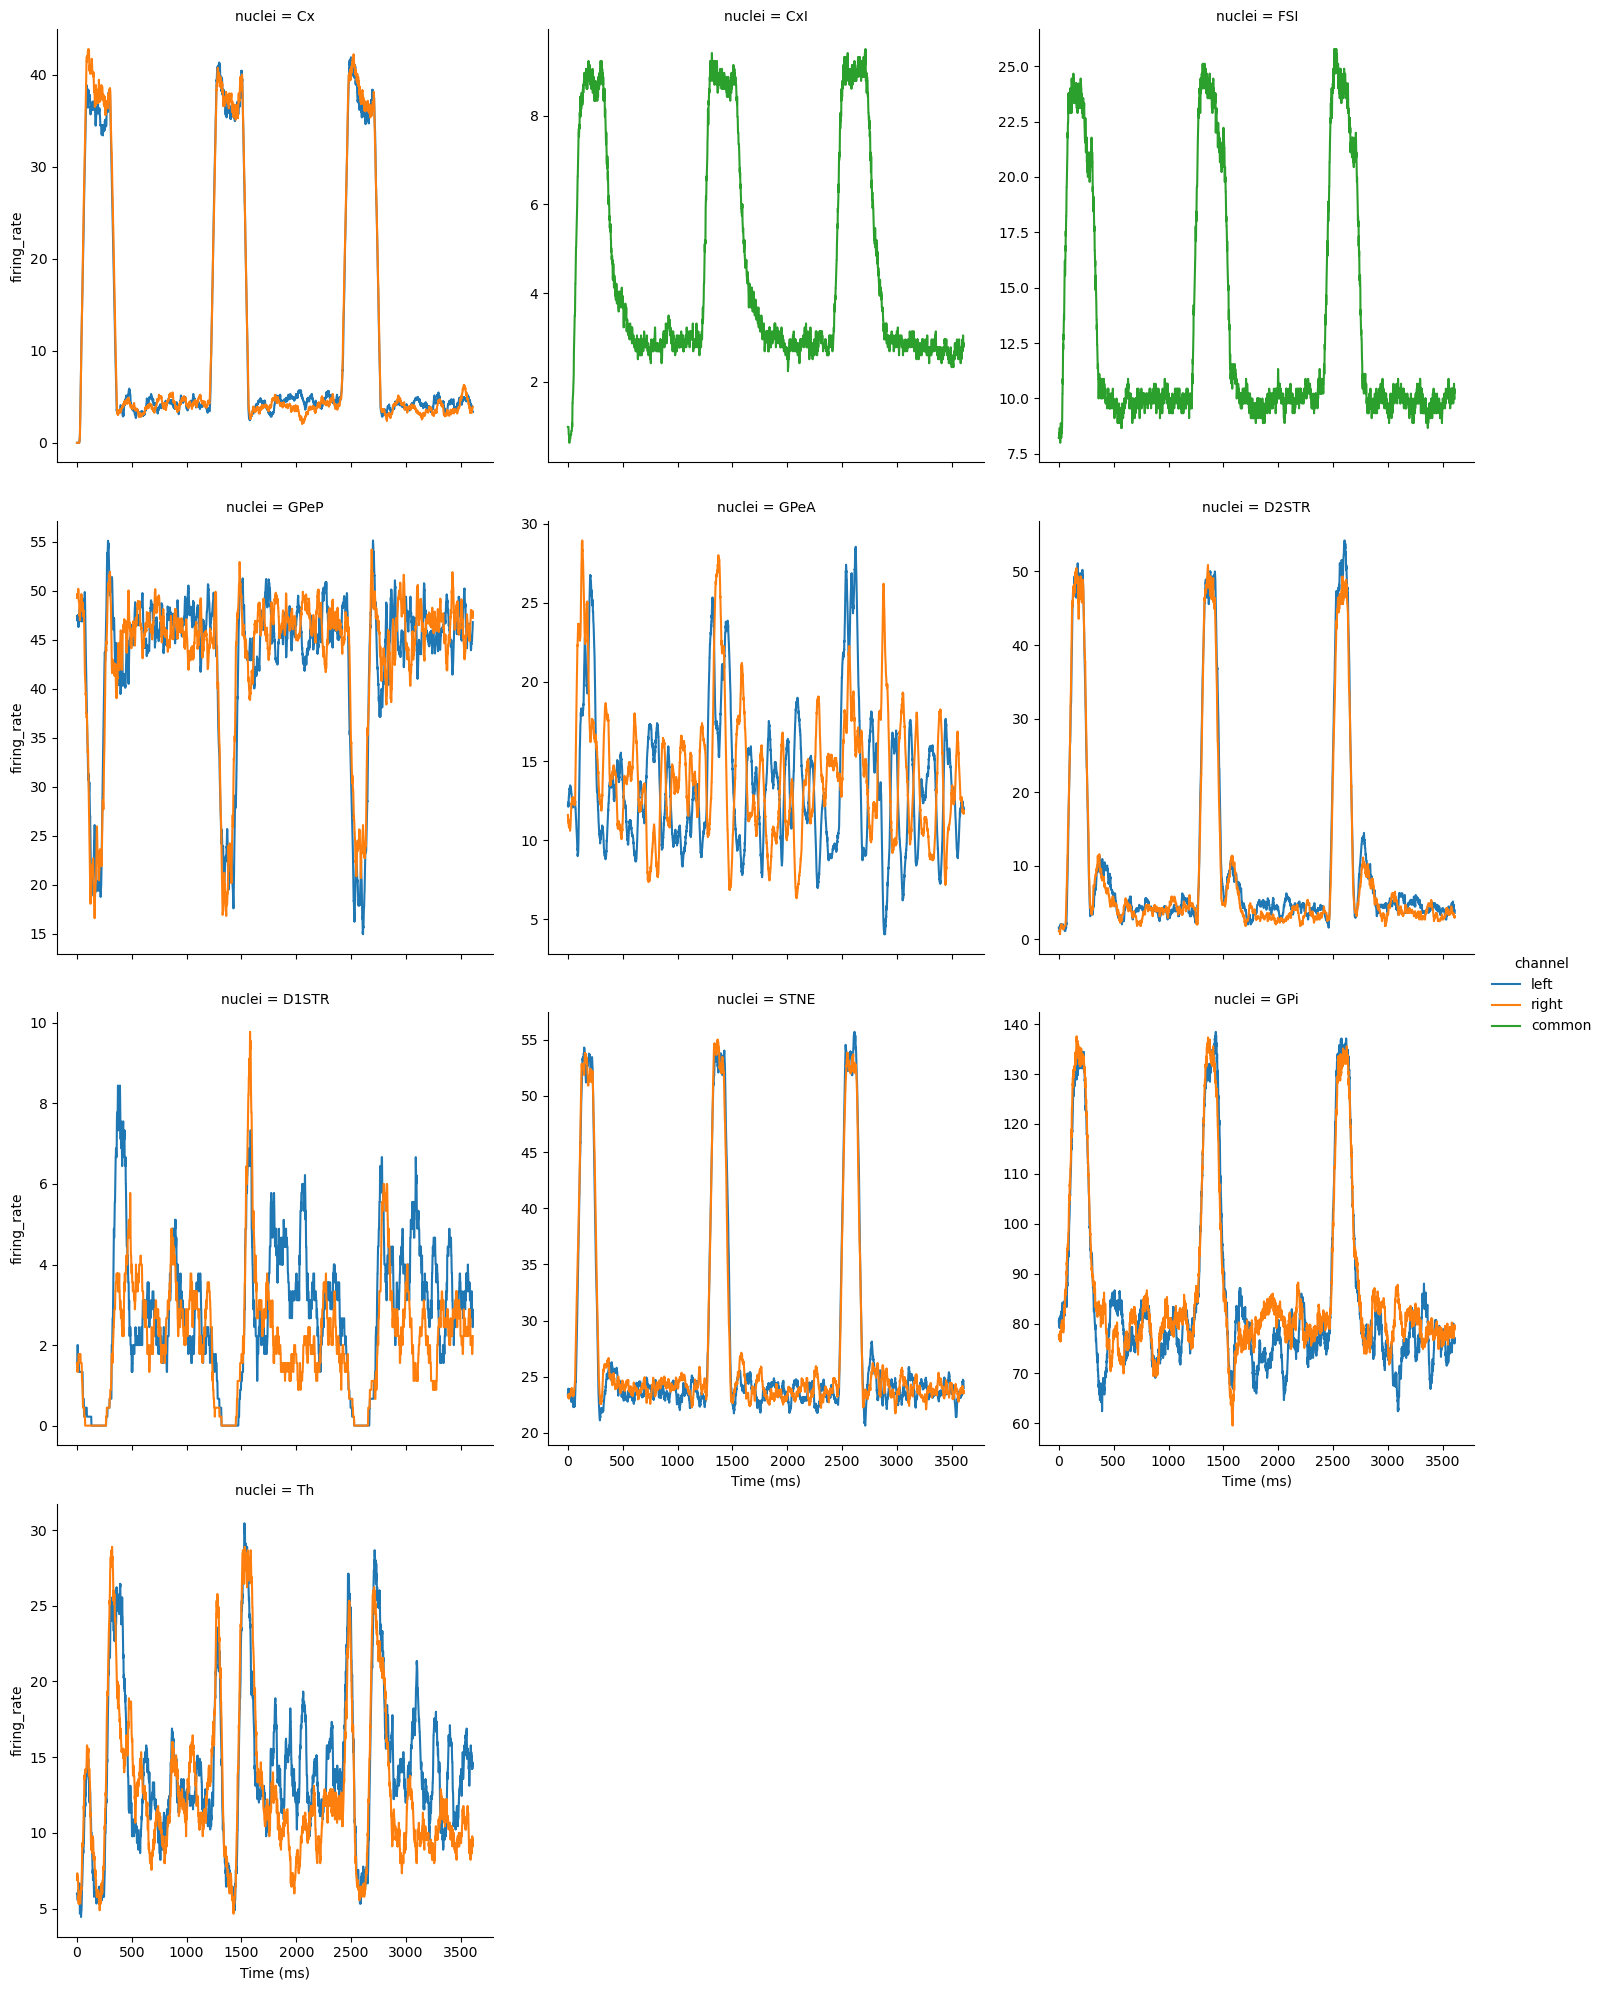

In [15]:
FR_fig_handles = plt_func.plot_fr_stop(firing_rates)